<a href="https://colab.research.google.com/github/Roby290597/nlp_exercise/blob/main/bundestags_reden_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET
import requests
import sys 


In [2]:
from pathlib import Path

extr = next((str(p/"extr") for p in [Path.cwd()] + list(Path.cwd().parents) if (p/"extr").is_dir()), None)
if extr and extr not in sys.path:
    sys.path.insert(0, extr)
print("extr hinzugefügt zu sys.path:", extr)

from redner_extraction import extract_speeches, extract_all_speakers 


extr hinzugefügt zu sys.path: c:\Users\brand\OneDrive\Desktop\AI_Selbststudium\ML_little\bundestag_reden\extr


c:\Users\brand\anaconda3\envs\job\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [3]:
url = "https://www.bundestag.de/resource/blob/1115000/21032.xml"
response = requests.get(url)

# XML in einen Tree parsen
tree = ET.ElementTree(ET.fromstring(response.content))

# Wurzel-Element abrufen
root = tree.getroot()

print(root.keys())

['vertrieb', 'herstellung', 'sitzung-ort', 'herausgeber', 'issn', 'wahlperiode', 'sitzung-nr', 'sitzung-datum', 'sitzung-start-uhrzeit', 'sitzung-ende-uhrzeit', 'sitzung-naechste-datum', 'start-seitennr']


### Extraktion der Reden mitsamt Redner

In [10]:
reden = {}
redner = []
doppelt = []
# Beispiel-Ausgabe
for speech in extract_speeches(root):
    #print(f"Redner: {speech['name']}\nRede: {speech['text'][:200]}...\n")
    if speech['name'] not in redner:
        redner.append(speech['name'])
        reden[speech['name']] = speech['text']
    else:
        print("DOPPELT:", speech['name'])
        reden[speech['name']] += "\n Nächste Rede:" + speech['text']
        doppelt.append(speech['name'])

DOPPELT: Mandy Eißing
DOPPELT: Peter Bohnhof
DOPPELT: Mahmut Özdemir
DOPPELT: Klaus Wiener
DOPPELT: Mirze Edis


In [5]:
redner_party = []
all_speakers = extract_all_speakers(root)
for speaker in all_speakers:
    print(speaker)
    redner_party.append((speaker['vorname'] + " " + speaker['nachname'], speaker['fraktion']))

{'vorname': 'Bärbel', 'nachname': 'Bas', 'fraktion': '', 'rolle_kurz': 'Bundesministerin BMAS'}
{'vorname': 'Hans-Jürgen', 'nachname': 'Goßner', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Wilfried', 'nachname': 'Oellers', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Ricarda', 'nachname': 'Lang', 'fraktion': 'BÜNDNIS\xa090/DIE GRÜNEN', 'rolle_kurz': ''}
{'vorname': 'Pascal', 'nachname': 'Meiser', 'fraktion': 'Die Linke', 'rolle_kurz': ''}
{'vorname': 'Dagmar', 'nachname': 'Schmidt', 'fraktion': 'SPD', 'rolle_kurz': ''}
{'vorname': 'Peter', 'nachname': 'Bohnhof', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Sandra', 'nachname': 'Carstensen', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Armin', 'nachname': 'Grau', 'fraktion': 'BÜNDNIS\xa090/DIE GRÜNEN', 'rolle_kurz': ''}
{'vorname': 'Nora', 'nachname': 'Seitz', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Leif-Erik', 'nachname': 'Holm', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Peter', 'nachn

In [6]:
political_party = []
for name, party in redner_party:
    political_party.append(party) 

Counter({'CDU/CSU': 23, 'AfD': 18, 'BÜNDNIS\xa090/DIE GRÜNEN': 11, 'SPD': 10, 'Die Linke': 7, '': 5})


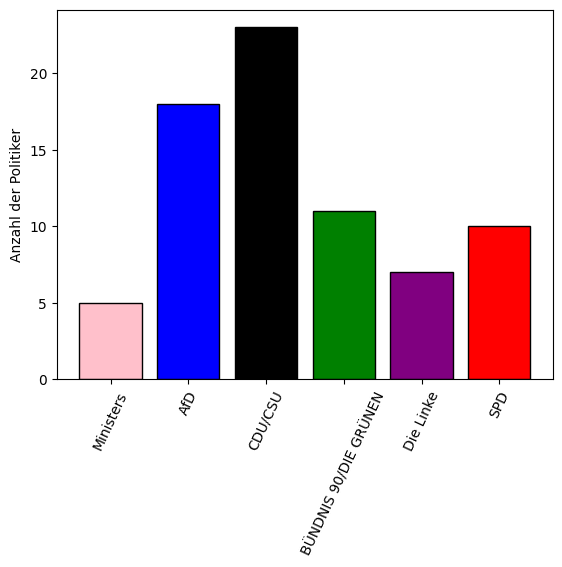

In [12]:
from collections import Counter
import matplotlib.pyplot as plt


poli_party = Counter(political_party)
print(poli_party)

labels = [p.replace("\xa0", " ") if p != "" else "Ministers" for p in poli_party.keys()]
poli_party_col = ["pink","blue", "black", "green", "purple", "red"]
labels_col = list(zip(labels, poli_party_col))

plt.bar(labels, list(poli_party.values()), color=poli_party_col, edgecolor='black')
plt.xticks(rotation=65)
plt.ylabel("Anzahl der Politiker")
plt.show()

In [13]:
for i, poli in enumerate(reden.keys()):
    print(f"die Länge der Reden von {poli} ist {len(reden[poli])} Zeichen.")

die Länge der Reden von Bärbel Bas ist 3926 Zeichen.
die Länge der Reden von Hans-Jürgen Goßner ist 4801 Zeichen.
die Länge der Reden von Wilfried Oellers ist 3031 Zeichen.
die Länge der Reden von Ricarda Lang ist 5828 Zeichen.
die Länge der Reden von Pascal Meiser ist 6894 Zeichen.
die Länge der Reden von Dagmar Schmidt ist 4048 Zeichen.
die Länge der Reden von Peter Bohnhof ist 8993 Zeichen.
die Länge der Reden von Sandra Carstensen ist 3915 Zeichen.
die Länge der Reden von Armin Grau ist 3252 Zeichen.
die Länge der Reden von Nora Seitz ist 4075 Zeichen.
die Länge der Reden von Leif-Erik Holm ist 4023 Zeichen.
die Länge der Reden von Peter Aumer ist 4249 Zeichen.
die Länge der Reden von Jan Dieren ist 3333 Zeichen.
die Länge der Reden von Elisabeth Winkelmeier-Becker ist 3684 Zeichen.
die Länge der Reden von Tobias Matthias Peterka ist 7068 Zeichen.
die Länge der Reden von Axel Müller ist 5325 Zeichen.
die Länge der Reden von Lena Gumnior ist 4502 Zeichen.
die Länge der Reden von Mah

C:\Users\brand\AppData\Local\Temp\ipykernel_30684\2701150744.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes = ax.boxplot(data, patch_artist=True, labels=labels, showfliers=True)


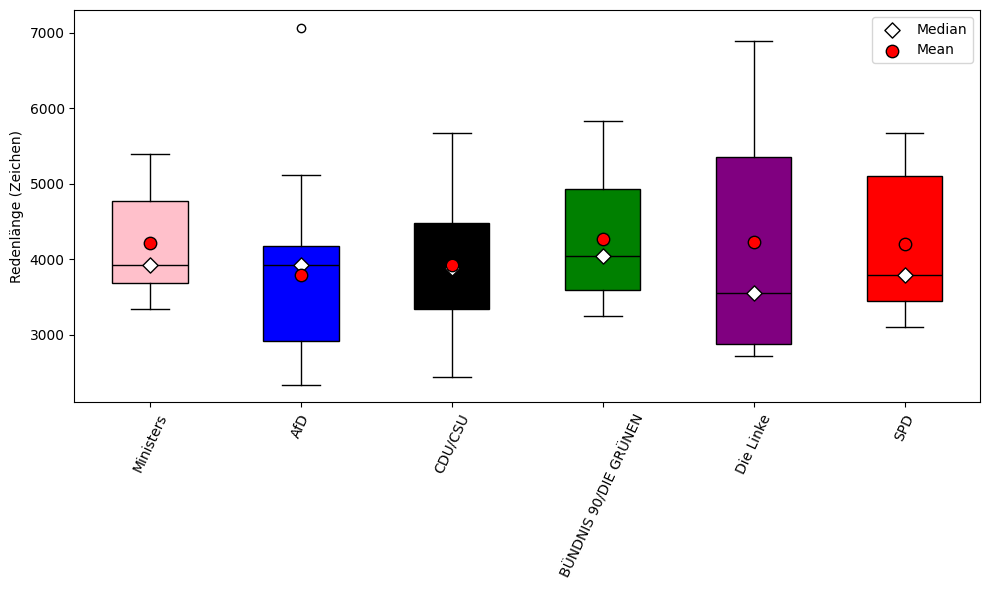

In [21]:
import numpy as np

# erstelle eine Liste von Sublisten mit Redenlängen pro Partei (Reihenfolge entspricht `labels`)
party_map = {}
for name, party in redner_party:
    key = party.replace("\xa0", " ") if party else "Ministers"
    text = reden.get(name)
    if name in doppelt:
        if text:
            party_map.setdefault(key, []).append(len(text)/2)
    else:
        if text:
            party_map.setdefault(key, []).append(len(text))

data = [party_map.get(lbl, []) for lbl in labels]


fig, ax = plt.subplots(figsize=(10, 6))
boxes = ax.boxplot(data, patch_artist=True, labels=labels, showfliers=True)

# Farben für Boxen beibehalten
for patch, c in zip(boxes['boxes'], poli_party_col):
    patch.set_facecolor(c)
for median_line in boxes['medians']:
    median_line.set_color('black')

# Median und Mean berechnen und plotten
x = np.arange(1, len(data) + 1)
medians = [np.median(d) if len(d) else np.nan for d in data]
means = [np.mean(d) if len(d) else np.nan for d in data]

ax.scatter(x, medians, color='white', marker='D', s=60, zorder=5, label='Median', edgecolors='black')
ax.scatter(x, means, color='red', marker='o', edgecolor='black', s=80, zorder=6, label='Mean')

ax.set_ylabel("Redenlänge (Zeichen)")
plt.xticks(rotation=65)
ax.legend(loc='best')
plt.tight_layout()
plt.show()